# Module 1 - BinaryClassification

In this module you will explore different techniques to predict binary targets. By the end of this module you will be able to:

- Identify some of the most relevant binary classification techniques.
- Apply a regression approach for binary prediction.
- Compare the results from different classification models through relevant metrics.

## Classification

A very common task in Machine Learning is the classification task. In simple words, classification refers to the task of predicting the label of a target categorical variable, given a series of inputs. Therefore, binary classification refers to the task of predicting the label of a binary variable.

Binary classification is a **supervised learning** task. This means that, in order to allow our models to be trained, each sample of our training data must have the desired output labeled.

In the following cells, we are going to explore some of the most popular classification algorithms for binary classification. It is important to mention that this courselet will not cover the theorical details of each algorithm, but instead their exposure, overview and application. 

**Data**

For this module, we will use a dataset containing the diagnostic of multiple Breast Cancer tests in Wisconsin. More information about this dataset can be found in the following [link](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

Let's start by creating our df and doing some data pre-processing.

In [1]:
# Loading df
import pandas as pd
import numpy as np
df = pd.read_csv("datasets/wdbc.data", header=None)
df.columns = ['ID', 'Diagnosis'] + [f'Feature {i}' for i in range(2, len(df.columns))]
# As our target is to predict Malign cancer, we are going to set M in Diagnosis as 1 and Benign as 0
df["Diagnosis"] = np.where(df["Diagnosis"] == "M",1,0)
df

,ID,Diagnosis,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 22,Feature 23,Feature 24,Feature 25,Feature 26,Feature 27,Feature 28,Feature 29,Feature 30,Feature 31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
# We need to create our training and testing df's. We are going to use a conventional 80-20 split. 
from sklearn.model_selection import train_test_split
X = df.drop(["ID","Diagnosis"],axis=1)
y = df["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=14)

### Naive Bayes

One of the most simple and common classification methods is the Naive Bayes algorithm. Based on the [Bayes Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem), this family of models makes the "naive" assumption that the explanatory features are independent from each other, and follow the same distribution. With this assumption, it captures a probability for each of the target labels. For this example, we are using a Gaussian Naive Bayes, assuming that each of the explanatory features follow a normal distribution. To learn more about the model and methods used in the following lines of code, you can go to the [source documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB).

In [3]:
# Import model class from the source library
from sklearn.naive_bayes import GaussianNB
# Creating our NaiveBayes classifier
nb_clf = GaussianNB()
# Fitting our model
nb_clf.fit(X_train, y_train)
# Predictions
nb_predictions = nb_clf.predict(X_test) 

### SVM

Support Vector Machine is another very common type of algorith. This algorith attempts to find the hyperplane that better separates the data in an n-features dimensional space. To learn more about the model and methods used in the following lines of code, you can go to the [source documentation](https://scikit-learn.org/stable/modules/svm.html).

In [4]:
# Import model class from the source library
from sklearn import svm
# Creating our svm classifier
svm_clf = svm.SVC()
# Fitting our model
svm_clf.fit(X_train, y_train)
# Predictions
svm_predictions = svm_clf.predict(X_test) 

### Gradient Boosting Classifier

Now, we will fit a boosting classifier. This is a more complex type of model in which multiple steps are taken. In each step, a model (typically a decision tree) is build to correct the errors from the previous step and improve the performance. To learn more about the model and methods used in the following lines of code, you can go to the [source documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [5]:
# Import model class from the source library
from sklearn.ensemble import GradientBoostingClassifier 
# Creating our GB classifier
gb_clf = GradientBoostingClassifier() 
# Fitting our model
gb_clf.fit(X_train, y_train)
# Predictions 
gb_predictions = gb_clf.predict(X_test)

### Logistic Regression

Logistic Regression is a very common statistical method used for classification. This type of model builds a coefficient for each of the explanatory features, to estimate a value between 0 and 1 which represents the probability for our target feature to be 1. If the estimated value is greater or equal to 0.5, then we classify our target feature as 1, and 0 otherwise. 

Let's train a linear regression model.

In [6]:
# Import model class from the source library
from sklearn.linear_model import LogisticRegression 
# Creating our LR classifier
lr_clf = LogisticRegression(max_iter=1800)
# Fitting our model
lr_clf.fit(X_train, y_train)
# Predictions 
lr_predictions = lr_clf.predict(X_test)

## Evaluating our models

So far we have made predictions used 3 different model approaches. How do we know which model did a better job in predicting our target value? There are two metrics we are going to put attention to:

- **Accuracy:** This metric tells us the ratio of good predictions, by dividing the number of correctly predicted values over the total observed values. In formula terms:
$$
A = \frac{TruePositives + TrueNegatives}{TruePositives+TrueNegatives+FalsePositives+FalseNegatives}
$$

- **Precision:** In this metric we are only putting attention to the ability of our models to predict the positives, by dividing the number of correct positives over the number of totally predicted positives. In formula terms:
$$
P = \frac{TruePositives}{TruePositives+FalsePositives}
$$

Now we are going to compare our three classification models by using these metrics. 

In [7]:
from sklearn.metrics import accuracy_score, precision_score

# NB
nb_accuracy = round(accuracy_score(y_test,nb_predictions),2)
nb_precision = round(precision_score(y_test, nb_predictions),2)

# SVM
svm_accuracy = round(accuracy_score(y_test,svm_predictions),2)
svm_precision = round(precision_score(y_test, svm_predictions),2)

# GB
gb_accuracy = round(accuracy_score(y_test,gb_predictions),2)
gb_precision = round(precision_score(y_test, gb_predictions),2)

# LR
lr_accuracy = round(accuracy_score(y_test,lr_predictions),2)
lr_precision = round(precision_score(y_test, lr_predictions),2)

print(f"NB Accuracy: {nb_accuracy*100}%")
print(f"NB Precision: {nb_precision*100}%")
print("---------------------------")
print(f"SVM Accuracy: {svm_accuracy*100}%")
print(f"SVM Precision: {svm_precision*100}%")
print("---------------------------")
print(f"GB Accuracy: {gb_accuracy*100}%")
print(f"GB Precision: {gb_precision*100}%")
print("---------------------------")
print(f"LR Accuracy: {lr_accuracy*100}%")
print(f"LR Precision: {lr_precision*100}%")

NB Accuracy: 95.0%
NB Precision: 97.0%
---------------------------
SVM Accuracy: 92.0%
SVM Precision: 100.0%
---------------------------
GB Accuracy: 96.0%
GB Precision: 97.0%
---------------------------
LR Accuracy: 96.0%
LR Precision: 97.0%


Another approach to compare our results it's the use of a **confusion matrix**. A confusion matrix is a type of visualization in which which we can compare the predicted labels of our model and compare them with the true label

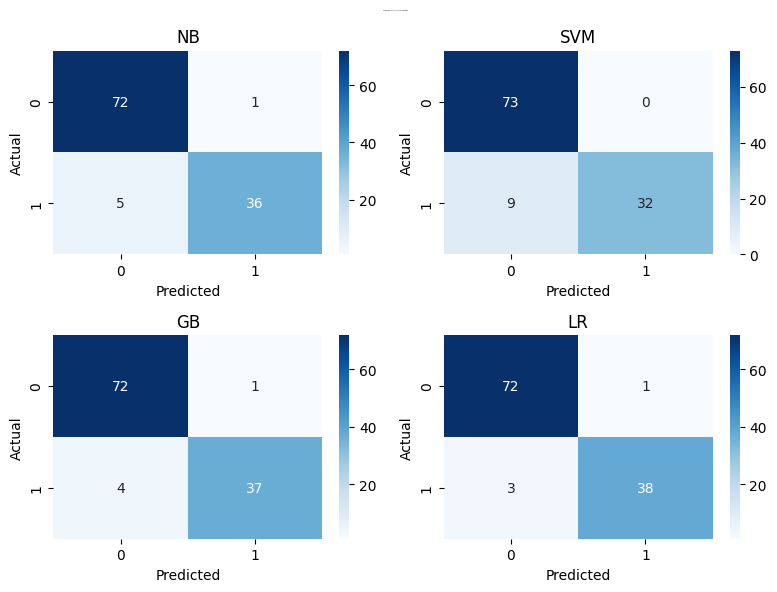

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

models = ["NB","SVM", "GB", "LR"]
predicted_labels = [nb_predictions, svm_predictions, gb_predictions, lr_predictions]
true_labels = [y_test]*4

# Create a grid for displaying confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle("Confusion Matrices for Four Models", fontsize=1)

for i in range(2):  # Loop through rows
    for j in range(2):  # Loop through columns
        cm = confusion_matrix(true_labels[i*2 + j], predicted_labels[i*2 + j])
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i][j])
        axes[i][j].set_title(models[i*2 + j])
        axes[i][j].set_xlabel("Predicted")
        axes[i][j].set_ylabel("Actual")

plt.tight_layout()
plt.show()

As we can notice, the 4 models perform quite similar, with an accuracy between 92-96%. While our SVM showed a precision of 100%, it is important to notice that it missed to properly predict 9 positive tests, which led to a lowered accuracy compared to our other 2 models.

## Hands-on

Now it's your turn to test the models that we have covered and so far and compare their performance on a different dataset. You will use a dataset with US-Census data to predict whether or not an individual's income exceeds $50K/year. More information about this data can be found [here](https://archive.ics.uci.edu/dataset/2/adult).

Your tasks are the following:

1. Perform any necessary analysis, cleaning and pre-processing. We recommend you to look for distribution, missing values, and apply some of the concepts covered in the courselet "Machine Learning Process - 5 steps"
2. Fit each of the 4 models we covered in this module.
3. Evaluate the 4 models.

In [9]:
# Loading the data
from ucimlrepo import fetch_ucirepo  
adult = fetch_ucirepo(id=2) 
   
X = adult.data.features 
y = adult.data.targets 

In [10]:
# Displaying X
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [11]:
# Displaying y
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [12]:
# Data Preprocessing - Your code


In [13]:
# Once you have completed the data preparation, you can run this cell to split your data. You can change the seed and the test size. 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=14)

In [14]:
# Training your models


In [15]:
# Evaluating your models
